# Model Selection : Random Forest
This part aims to assess the performances of the random forest model

In [1]:
library(randomForest)
training_set <- read.csv("../Data/PreProcess/processed_training_data_split.csv")
validation_set <- read.csv("../Data/PreProcess/processed_verification_data_split.csv")

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [2]:
column_to_drop<-c("X.1","X","wind.powered","dam","None","X40")
training_set<-training_set[,!(names(training_set) %in% column_to_drop)] # drop the desired columns
validation_set<-validation_set[,!(names(validation_set) %in% column_to_drop)] # drop the desired columns

## Model Setting and Training : 

In [3]:
training_set$id = factor(training_set$id) 
pump_classifier = randomForest(id ~ ., data=training_set, ntree=450,  mtry=18, importance=TRUE)
save(pump_classifier,file = "random_forest.RData")
#bench (funder, installer, ward dropped)
#tree : 100 , split : 8 , error rate : 22.36% -> ~90% error rate at functional needs repair (worst class) (77% accuracy on val set)
#tree : 200 , split : 8 , error rate : 22.43%
#tree : 80 , split : 8, error rate : 22.49%  
#tree : 100 , split : 10, error rate : 21.84%
#tree : 120 , split : 10, error rate : 21.82%
#tree : 150 , split : 12, error rate : 21.47%  -> ~83% error rate ..... (78% acc. on val. set)
#tree : 120 , split : 15, error rate : 21.35% -> ~80% error rate at functional needs repair 
#tree : 250, split : 15, error rate : 21.35% -> ~80% error rate at functional needs repair 
#tree : 250, split : 8, error rate : 22.26% -> ~90% error rate at functional needs repair
#tree : 120, split : 20, error rate : 21.21% -> ~77% error rate at functional needs repair
#tree : 120, split : 35, error rate : 21.59% -> ~75% error rate at functional needs repair (78% accuracy on validation set)
#tree : 200, split : 25, error rate : 21.13% -> ~75% error rate at functional needs repair (78% acc. on val. set-)
#tree : 250, split : 28, error rate : 21.12% -> ~75% error rate at functional needs repair (78% acc. on val. set-)
#tree : 500, split : 25, error rate : 21.2% -> ~76% error rate at functional needs repair (78 % acc. on val. set-)
#(error rate = OOB)

# increasing tree number decreases the variance and keeps the bias constant -> good way to avoid overfitting

# bench with classified funder :
#tree : 450, split : 20, error rate : 20.99% -> 76% error rate at functional needs repair (78.4% acc. on val. set-)
#tree : 600, split : 18, error rate : 20.94% ->77 % error rate at functional needs repair (78.3% acc. on val. set-)
#tree : 450, split : 18, error rate : 20.88% -> 77% error rate at functional needs repair (78.52% acc. on val. set-)
#tree : 350, split : 18, error rate : 21% ->77 % error rate at functional needs repair (78.48% acc. on val. set-)
#tree : 350, split : 20, error rate : 21% ->76 % error rate at functional needs repair (78.4% acc. on val. set-)
#tree : 350, split : 23, error rate : 21.07% ->75.2 % error rate at functional needs repair (78.4% acc. on val. set-)
#tree : 350, split : 25, error rate : 21.1% -> 74.5% error rate at functional needs repair (78% acc. on val. set-)
#tree : 350, split : 29, error rate : 21.24% -> 73.5% error rate at functional needs repair (78.3% acc. on val. set-)
#tree : 350, split : 27, error rate : 21.29% -> 74.4% error rate at functional needs repair (78.3% acc. on val. set-)
#tree : 350, split : 32, error rate : 21.35% -> 73.5% error rate at functional needs repair (78.4% acc. on val. set-)

# bench with classified funder and 3 variables dropped:

#tree : 450, split : 18, error rate : % -> % error rate at functional needs repair (% acc. on val. set-)

## For now : best parameters are at 450 trees and 18 random features per tree (wth funders)
### results -> 78.5% accuracy on validation set BUT still 77% of error rate for the 'functional needs repair' class
## Model Performances (OOB) :


Call:
 randomForest(formula = id ~ ., data = training_set, ntree = 450,      mtry = 18, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 450
No. of variables tried at each split: 18

        OOB estimate of  error rate: 20.93%
Confusion matrix:
                        functional functional needs repair non functional
functional                   23041                     378           2316
functional needs repair       2018                     785            597
non functional                4406                     181          13567
                        class.error
functional                0.1046823
functional needs repair   0.7691176
non functional            0.2526716

,functional,functional.needs.repair,non.functional,MeanDecreaseAccuracy,MeanDecreaseGini
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Trust,-9.917557e-07,6.899683e-06,2.635071e-05,1.006971e-05,6.867233
SWC,-3.359507e-05,-1.774938e-06,9.102923e-05,1.645548e-05,5.166321
fluoride,7.843433e-05,-2.301655e-05,-1.459525e-05,3.543134e-05,14.497223
cattle.trough,1.396256e-04,-1.831120e-06,-4.788306e-05,5.752742e-05,9.014343
colored,1.430143e-04,8.652315e-04,-7.127920e-05,1.129534e-04,34.505536
X9,2.418822e-04,2.993725e-05,5.426282e-05,1.548036e-04,12.959592
X8,1.358933e-04,9.781741e-04,2.451598e-04,2.383831e-04,19.810630
X7,2.757359e-04,4.490814e-05,5.073015e-04,3.479258e-04,17.364676
X99,1.875721e-04,1.082408e-04,1.154155e-03,5.527520e-04,21.755673


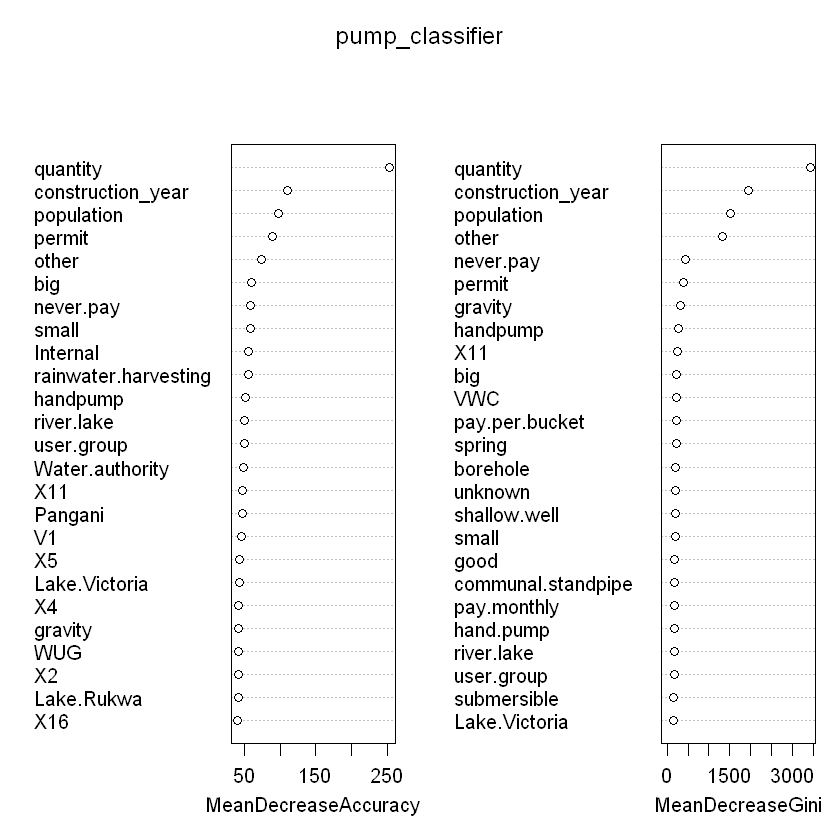

In [4]:
load("random_forest.RData")
pump_classifier
varImpPlot(pump_classifier, n.var=min(25, nrow(pump_classifier$importance)))
imp<-data.frame(pump_classifier$importance)
imp<-imp[order(imp$MeanDecreaseAccuracy),]
imp
# --> high mean decrease accuracy = variable having a high impact on accuracy

### The variables having the highest (positive) impact on model performances are : *quantity*, *construction_year*, *population* and *permit*

## Confusion Matrix on Validation Set :

In [5]:
library(ROCR)
pred <- predict(pump_classifier,validation_set) # Model prediction on validation set
dim(validation_set)
table(observed=validation_set$id,predicted=pred) # CONFUSION MATRIX ON VALIDATION SET

[1] 12111    84

                         predicted
observed                  functional functional needs repair non functional
  functional                    5802                     129            592
  functional needs repair        547                     225            145
  non functional                1156                      37           3477